In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('task_3a_sample_data.csv')
df.head()

,public_id,title,text,our rating
0,f2182a54,HUGE! Attorney Sidney Powell CONFIRMS Alleged ...,Last week Rep. Louie Gohmert told Chris Salced...,FALSE
1,c5175d8d,Paul Ryan’s Worst Ally - The New York Times,WHATEVER drama plays out when Republicans meet...,TRUE
2,213a870b,"You Can Get Jail Time Or $3,000 Fine For Not W...",Source page URL Title You Can Get Jail Time O...,FALSE
3,392886ea,Antifa gearing up for false flag violence disg...,With merchants in Democrat-run cities boarding...,FALSE
4,bc6d5d55,Remarks by President Biden on the Administrati...,State Dining Room 4:22 P.M. EST THE PRESIDEN...,partially false


In [3]:
X = df.drop('our rating', axis=1)
y = df['our rating']

X['total'] = X['title'] + ' ' + X['text']

X.shape, y.shape

((50, 4), (50,))

In [4]:
words = X.copy()

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skyehigh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/skyehigh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
corpus = []
corpus_test = []

for i in range(len(words)):
    review = re.sub('[^a-zA-Z]', ' ', words['total'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=50000, ngram_range=(1,3))
X = tfidf_vec.fit_transform(corpus).toarray()
X.shape

(50, 39271)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [10]:
prediction = classifier.predict(X_test)

report = metrics.classification_report(y_test, prediction, output_dict=True)

report

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'FALSE': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75, 'support': 4},
 'TRUE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'partially false': {'precision': 0.6666666666666666,
  'recall': 0.8,
  'f1-score': 0.7272727272727272,
  'support': 5},
 'accuracy': 0.7,
 'macro avg': {'precision': 0.47222222222222215,
  'recall': 0.5166666666666667,
  'f1-score': 0.4924242424242424,
  'support': 10},
 'weighted avg': {'precision': 0.6333333333333333,
  'recall': 0.7,
  'f1-score': 0.6636363636363636,
  'support': 10}}

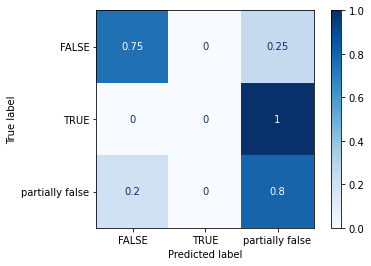

In [11]:
from sklearn.metrics import plot_confusion_matrix
cm = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize='true')